# БФБО-05-23 Баранов Арсений Юрьевич

Напишите программы с использованием Python или C# для решения
следующих задач:  

Три игрока (с номерами 1, 2 и 3), имеющие изначально X, Y и Z
жетонов соответственно, играют в следующую игру. В каждом раунде каждый
игрок ставит на кон один жетон. Затем бросают кубик, на котором цифры 4, 5,
6 заменены на 1, 2 и 3. При выпадении числа i игрок с номером i забирает с
кона все три жетона. Игра заканчивается, когда кто-нибудь из игроков
проигрывает все жетоны. Введем функцию f(X, Y, Z), как среднюю
длительность игры (среднее количество раундов) при заданных начальных
капиталах X, Y, Z. Например, f(2, 2, 2) = 2. Ваша задача состоит в том, чтобы
определить эту функцию.  

Для этого необходимо написать программу, моделирующую игру,
накопить экспериментальные результаты, проанализировать их, а затем
выдвигать гипотезы о виде функции f, проверять их для разных входных
значений, и, отбросив неподходящие, найти решение.

In [6]:
import random

def play_game(X, Y, Z):
    rounds = 0
    tokens = [X, Y, Z]  # Начальные жетоны для каждого игрока

    while all(t > 0 for t in tokens):  # Пока у всех игроков есть жетоны
        rounds += 1
        tokens = [t - 1 for t in tokens]  # Каждый игрок ставит по одному жетону
        winner = random.randint(1, 3) - 1  # Бросок кубика (числа от 1 до 3)
        tokens[winner] += 3  # Победитель забирает все жетоны с кона

    return rounds

def estimate_average_duration(X, Y, Z, simulations=10000):
    total_rounds = sum(play_game(X, Y, Z) for _ in range(simulations))
    return total_rounds / simulations

# Пример использования
X, Y, Z = 2, 2, 2  # Начальные жетоны для каждого игрока
average_duration = estimate_average_duration(X, Y, Z)
print(f"Средняя длительность игры для начальных капиталов ({X}, {Y}, {Z}): {average_duration:.2f} раундов")


Средняя длительность игры для начальных капиталов (2, 2, 2): 2.00 раундов


Напишите программы с использованием Python или C# для решения
следующей задачи:  
Игрок A выбирает комбинацию из цифр 0 и 1 длиной 3 знака
(например, 001). Игрок B выбирает свою комбинацию (отличную от игрока A).
Подбрасывается монета и записываются результаты бросания (например,
101101..., где 0 обозначает «орел», а 1 — «решка»). Игра прекращается в тот
момент, когда в последовательности цифр на конце возникает комбинация,
выбранная A или B (побеждает A или B соответственно). Игра повторяется.  
а) Оценить шансы на выигрыш каждого из игроков R(A,B) (т.е.
отношение числа выигрышей игрока B к числу выигрышей игрока A).  
б) Для выбранной игроком A комбинации определить такую
комбинацию для игрока B, которая ему дает больше шансов на выигрыш.
Ниже представлена таблица значений R(A,B) для всевозможных
выбранных игроками A и B исходных комбинаций при «неограниченном
продолжении» игры (выделены наиболее выигрышные ситуации для игрока
B).

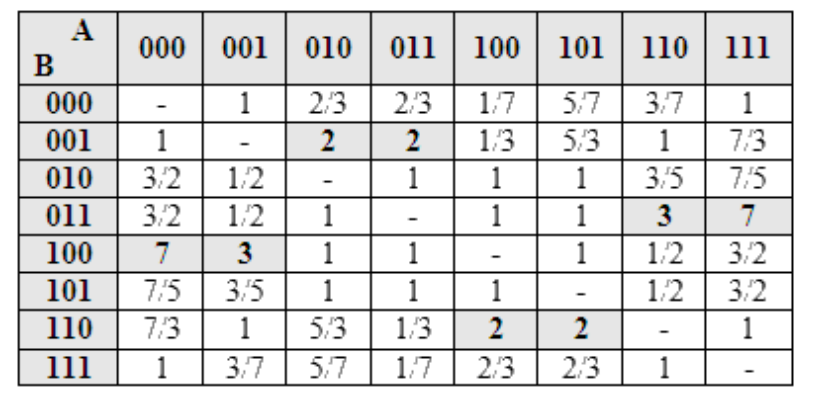

Пари является беспроигрышным (!) для игрока B. Парадокс заключается
в том, что какую бы комбинацию цифр не выбрал игрок A, его соперник B
может выбрать другую комбинацию, которая ему дает больше шансов на
выигрыш.

In [7]:
import random
from collections import defaultdict

# Функция для симуляции одной игры
def simulate_game(combo_A, combo_B):
    sequence = ""
    while True:
        flip = str(random.randint(0, 1))  # Генерируем случайный 0 или 1
        sequence += flip
        # Проверяем, не совпадает ли последняя часть последовательности с комбо A или B
        if sequence[-3:] == combo_A:
            return 'A'  # Победил игрок A
        elif sequence[-3:] == combo_B:
            return 'B'  # Победил игрок B

# Функция для оценки вероятностей выигрыша
def estimate_win_ratio(combo_A, combo_B, simulations=10000):
    wins = {'A': 0, 'B': 0}
    for _ in range(simulations):
        winner = simulate_game(combo_A, combo_B)
        wins[winner] += 1
    ratio = wins['B'] / wins['A'] if wins['A'] != 0 else float('inf')
    return wins, ratio

# Функция для нахождения лучшей комбинации для игрока B
def find_best_combo_for_B(combo_A, all_combos=['000', '001', '010', '011', '100', '101', '110', '111']):
    best_combo = None
    best_ratio = -1
    results = {}
    
    for combo_B in all_combos:
        if combo_B == combo_A:
            continue
        _, ratio = estimate_win_ratio(combo_A, combo_B)
        results[combo_B] = ratio
        if ratio > best_ratio:
            best_ratio = ratio
            best_combo = combo_B
            
    return best_combo, best_ratio, results

# Пример использования
combo_A = "001"  # Комбинация игрока A
best_combo, best_ratio, results = find_best_combo_for_B(combo_A)

print(f"Лучший выбор для игрока B против {combo_A} - это комбинация {best_combo} с шансом R(A, B) = {best_ratio:.2f}")
print("Результаты для всех комбинаций B:")
for combo, ratio in results.items():
    print(f"B: {combo}, R(A, B): {ratio:.2f}")


Лучший выбор для игрока B против 001 - это комбинация 100 с шансом R(A, B) = 3.00
Результаты для всех комбинаций B:
B: 000, R(A, B): 0.98
B: 010, R(A, B): 0.49
B: 011, R(A, B): 0.49
B: 100, R(A, B): 3.00
B: 101, R(A, B): 0.59
B: 110, R(A, B): 1.01
B: 111, R(A, B): 0.42
